In [ ]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load annotations
anno = pd.read_csv('data/annotations.csv')
print(anno.head())

# Load a sample audio file 
audio_path = 'data/audio/' + anno['filename'][0]
audio, sr = librosa.load(audio_path, sr=None)
print(f"Sample rate: {sr}, Audio length: {len(audio)/sr} seconds")

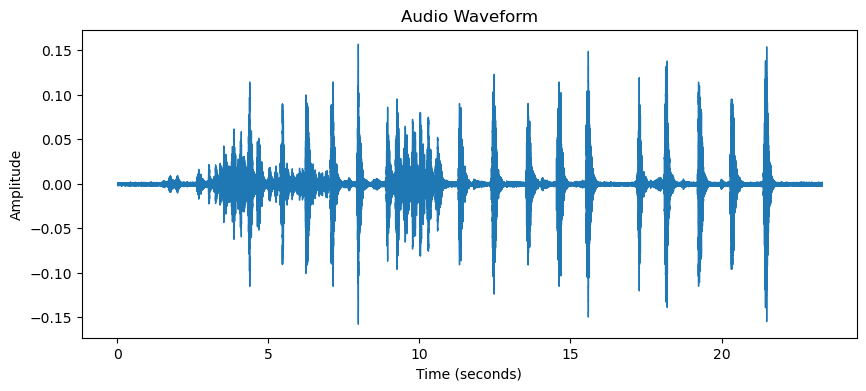

In [2]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()


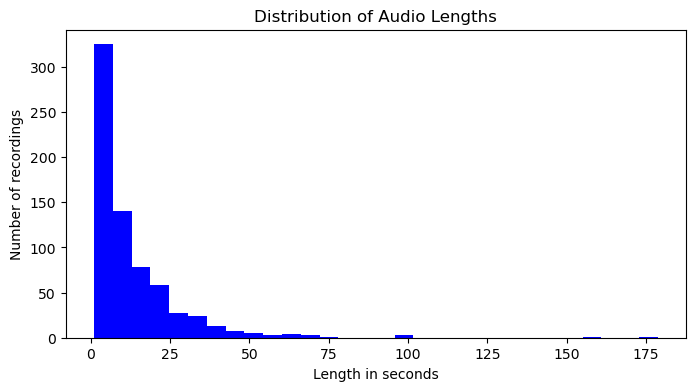

In [3]:
# Calculate lengths of all audio files
durations = []
for index, row in anno.iterrows():
    audio, sr = librosa.load('data/audio/' + row['filename'], sr=None)
    durations.append(float(len(audio) / sr))

# Plotting the distribution of durations
plt.figure(figsize=(8, 4))
plt.hist(durations, bins=30, color='blue')
plt.title('Distribution of Audio Lengths')
plt.xlabel('Length in seconds')
plt.ylabel('Number of recordings')
plt.show()


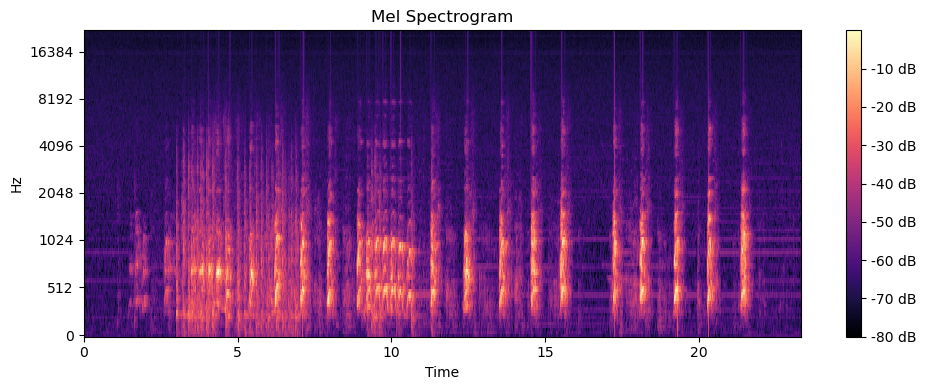

In [7]:
# Load audio data
audio_path = 'data/audio/' + anno['filename'][0]  # Make sure this is a valid path
audio, sr = librosa.load(audio_path, sr=None)

# Compute a Mel-scaled power spectrogram
S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)

# Convert to log scale (dB)
log_S = librosa.power_to_db(S, ref=np.max)

# Plotting the Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()


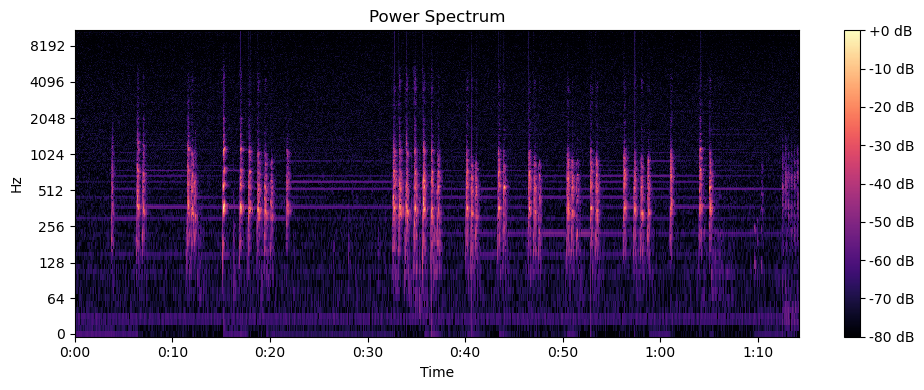

In [5]:
# Short-time Fourier transform
D = librosa.stft(audio)
# Convert to absolute values
D = np.abs(D)

# Plot the spectrum
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Power Spectrum')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


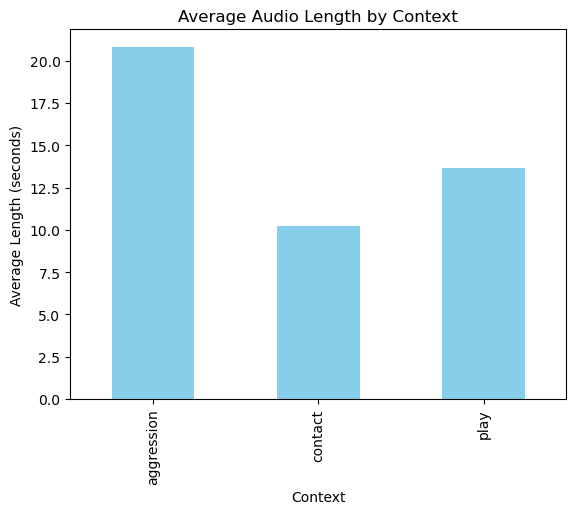

In [8]:
# Calculate duration of each audio file and add it to the DataFrame
durations = []
for filename in anno['filename']:
    audio_path = f'data/audio/{filename}'
    audio, sr = librosa.load(audio_path, sr=None)
    duration = len(audio) / sr  # Calculate duration in seconds
    durations.append(duration)

# Add the durations as a new column in the DataFrame
anno['duration'] = durations

# Group data by 'context' and compute average duration
avg_duration_by_context = anno.groupby('context')['duration'].mean()

# Plot
import matplotlib.pyplot as plt
avg_duration_by_context.plot(kind='bar', color='skyblue')
plt.title('Average Audio Length by Context')
plt.ylabel('Average Length (seconds)')
plt.xlabel('Context')
plt.show()


In [9]:
# Display descriptive statistics for duration
duration_stats = anno['duration'].describe()
print("Descriptive Statistics for Audio Durations:")
print(duration_stats)


Descriptive Statistics for Audio Durations:
count    693.000000
mean      12.770332
std       15.995594
min        1.049229
25%        3.047619
50%        8.078776
75%       15.905601
max      178.678345
Name: duration, dtype: float64


In [11]:
# Display value counts for categorical data
print("Distribution of Contexts:")
print(anno['context'].value_counts())

print("\nDistribution of Sex:")
print(anno['sex'].value_counts())

print("\nDistribution of Breeds:")
print(anno['breed'].value_counts())


Distribution of Contexts:
contact       385
play          209
aggression     99
Name: context, dtype: int64

Distribution of Sex:
male      577
female    116
Name: sex, dtype: int64

Distribution of Breeds:
Australian cattle dog       226
German shorthair pointer    178
Australian shepherd         169
Dachsund                     45
Labrador mix                 42
Springer spaniel             33
Name: breed, dtype: int64


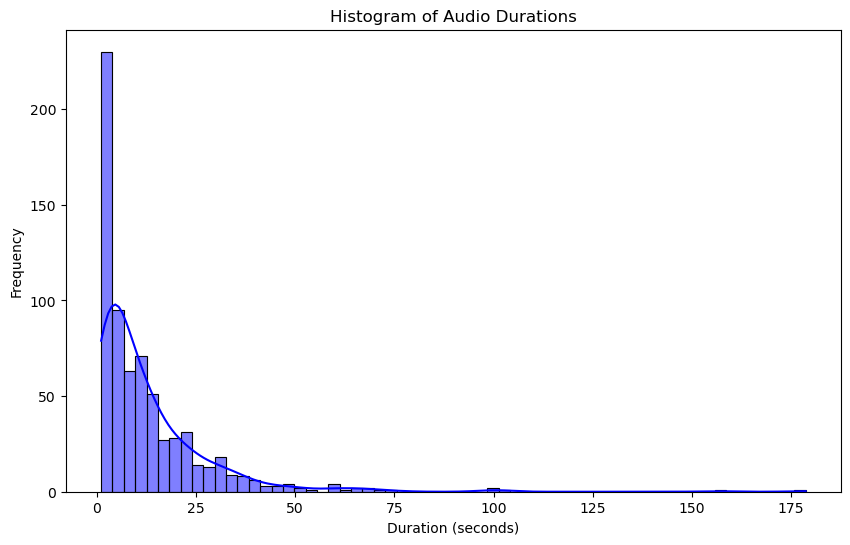

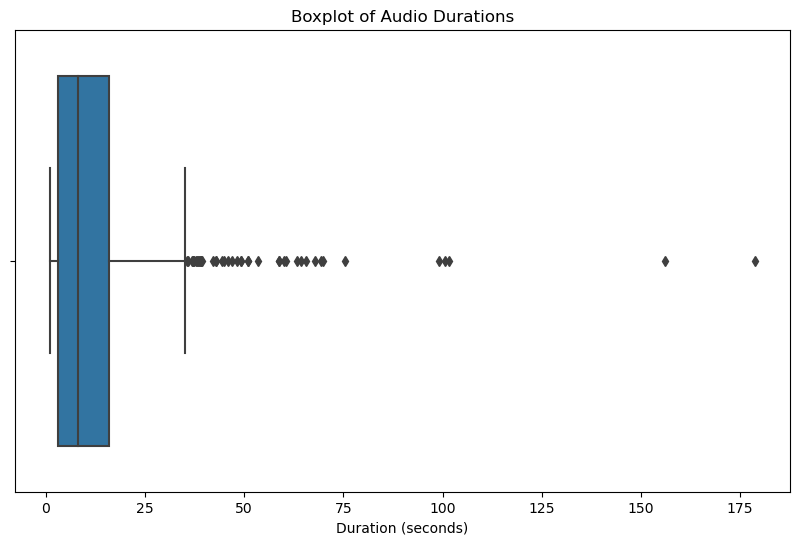

In [12]:
# Histogram of durations
plt.figure(figsize=(10, 6))
sns.histplot(anno['duration'], kde=True, color='blue')
plt.title('Histogram of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for durations
plt.figure(figsize=(10, 6))
sns.boxplot(x=anno['duration'])
plt.title('Boxplot of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.show()


In [14]:
# Create a pivot table counting the occurrences of each context for each dog
pivot_table = anno.pivot_table(index='name', columns='context', aggfunc='size', fill_value=0)

print(pivot_table)


context  aggression  contact  play
name                              
Farley            8       33    11
Freid            13        0    32
Keri             11       15    16
Louie             9       18     6
Luke             14       86    17
Mac              14       42    30
Roodie            8      105    39
Rudy              5        0    16
Siggy             9       41    21
Zoe               8       45    21


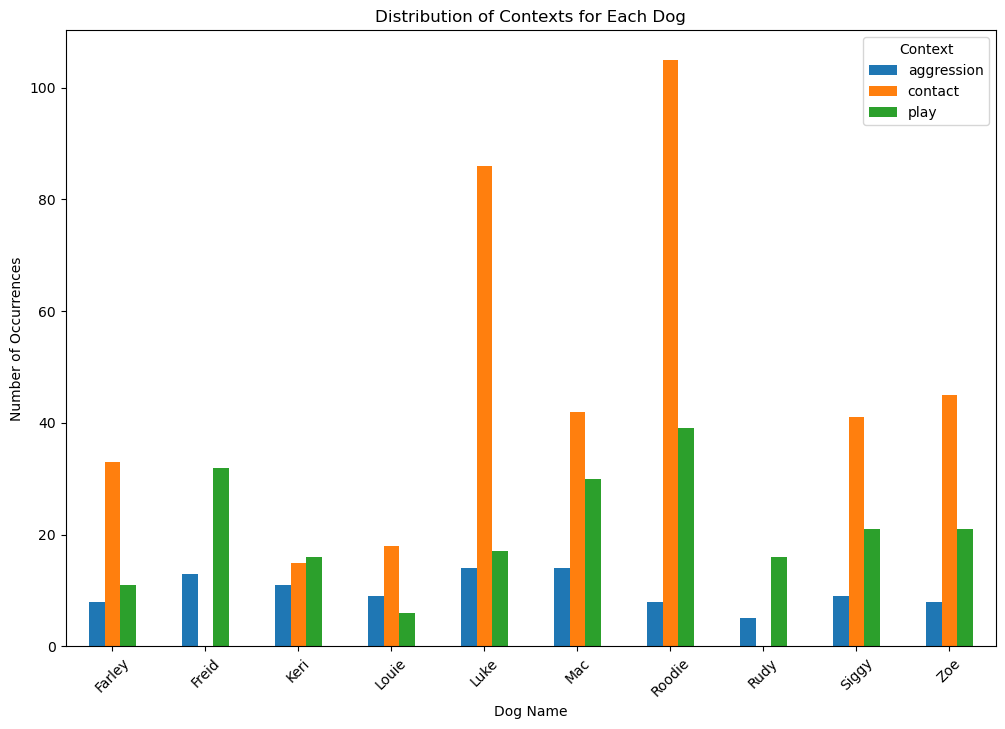

In [15]:
# Plot grouped bar chart
pivot_table.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.title('Distribution of Contexts for Each Dog')
plt.xlabel('Dog Name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Context')
plt.show()


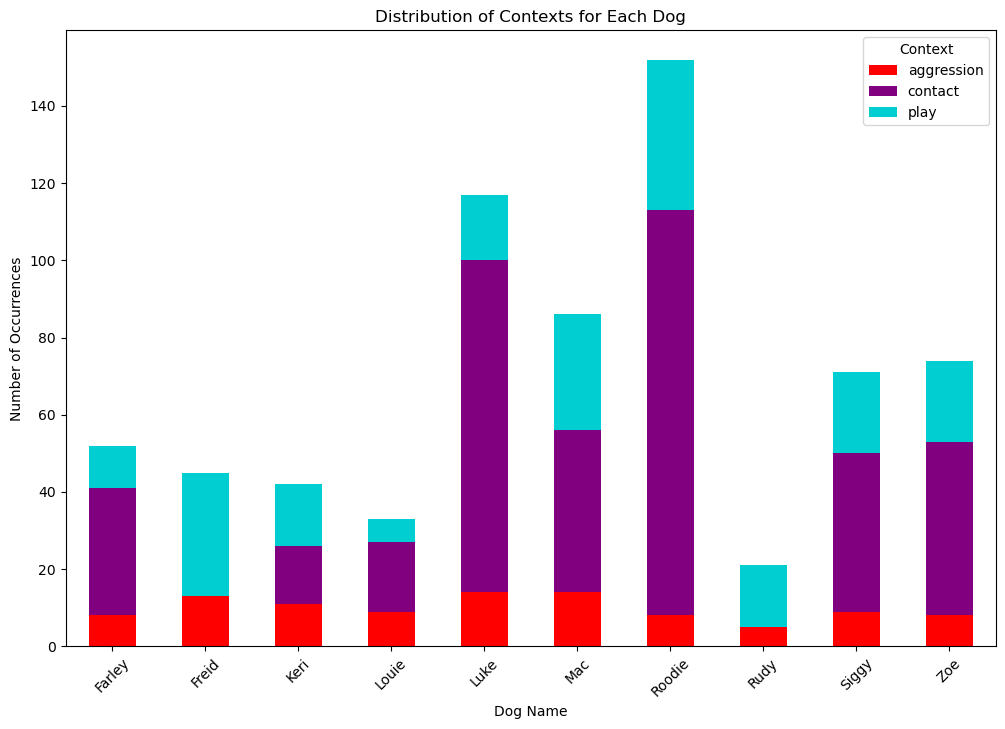

In [20]:
context_colors = {
    'play': 'darkturquoise',
    'aggression': 'red',
    'contact': 'purple',
}

column_colors = [context_colors[col] for col in pivot_table.columns]


# Plot a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, color=column_colors, figsize=(12, 8))
plt.title('Distribution of Contexts for Each Dog')
plt.xlabel('Dog Name')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Context')
plt.show()


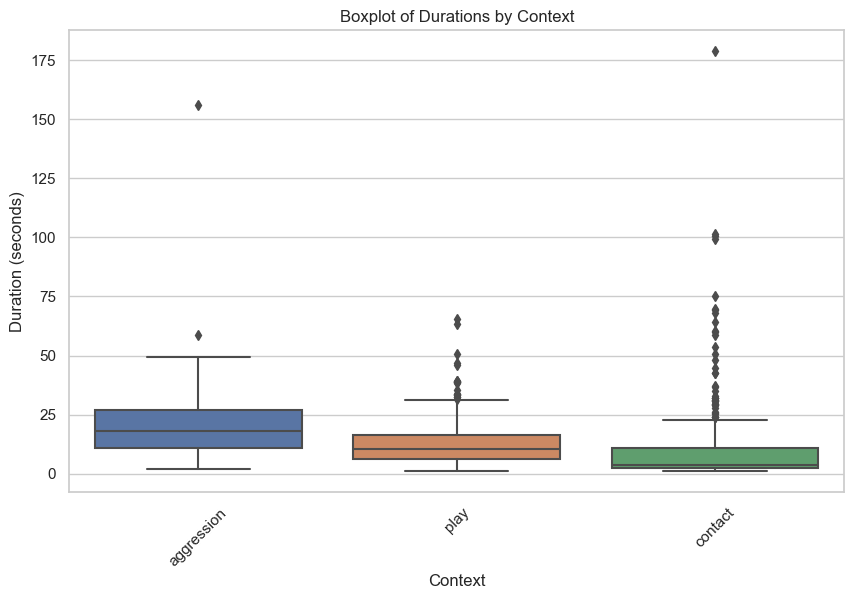

In [21]:
# Set a theme
sns.set_theme(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='context', y='duration', data=anno)
plt.title('Boxplot of Durations by Context')
plt.xlabel('Context')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)  # Rotate labels for better readability if necessary
plt.show()


In [26]:
import pandas as pd
import numpy as np
import librosa

def add_mfcc_features(audio_files):
    features_list = []  # Use a list to collect all DataFrame rows
    
    for file in audio_files:
        y, sr = librosa.load(f'data/audio/{file}', sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        
        # Compute mean and variance for each MFCC
        mfcc_mean = mfccs.mean(axis=1)
        mfcc_var = mfccs.var(axis=1)
        
        # Concatenate mean and variance
        mfcc_features = np.hstack((mfcc_mean, mfcc_var))
        
        # Create a Series and add it to the list
        features_list.append(pd.Series(mfcc_features))
    
    # Concatenate all Series in the list into a DataFrame
    features = pd.concat(features_list, axis=1).transpose()
    return features

# Assume anno is your DataFrame and it has a column 'filename' with audio file names
mfcc_features = add_mfcc_features(anno['filename'])

# Add these features to your annotations DataFrame
for i in range(mfcc_features.shape[1]):
    anno[f'mfcc_{i+1}'] = mfcc_features.iloc[:, i]

print("Expanded DataFrame with MFCC features:")
print(anno.head())


Expanded DataFrame with MFCC features:
          filename name     context  age  weight   sex  \
0    Mac-3-A-3.aif  Mac  aggression    5      34  male   
1    Mac-3-P-3.aif  Mac        play    5      34  male   
2   Mac-2-P-2d.aif  Mac        play    5      34  male   
3   Mac-2-P-2b.aif  Mac        play    5      34  male   
4  Mac-2-A-2a..aif  Mac  aggression    5      34  male   

                      breed   duration      mfcc_1     mfcc_2  ...  \
0  German shorthair pointer  23.316803 -487.802002  92.082977  ...   
1  German shorthair pointer   7.177868 -471.043823  82.983025  ...   
2  German shorthair pointer   9.843605 -487.935944  69.553703  ...   
3  German shorthair pointer   3.881791 -468.311554  42.437119  ...   
4  German shorthair pointer  17.903787 -500.644653  73.451767  ...   

      mfcc_17     mfcc_18     mfcc_19    mfcc_20     mfcc_21     mfcc_22  \
0  170.369858  325.145416  253.746918  78.707687   66.245308   80.412361   
1  304.395844  443.382874  226.411957  

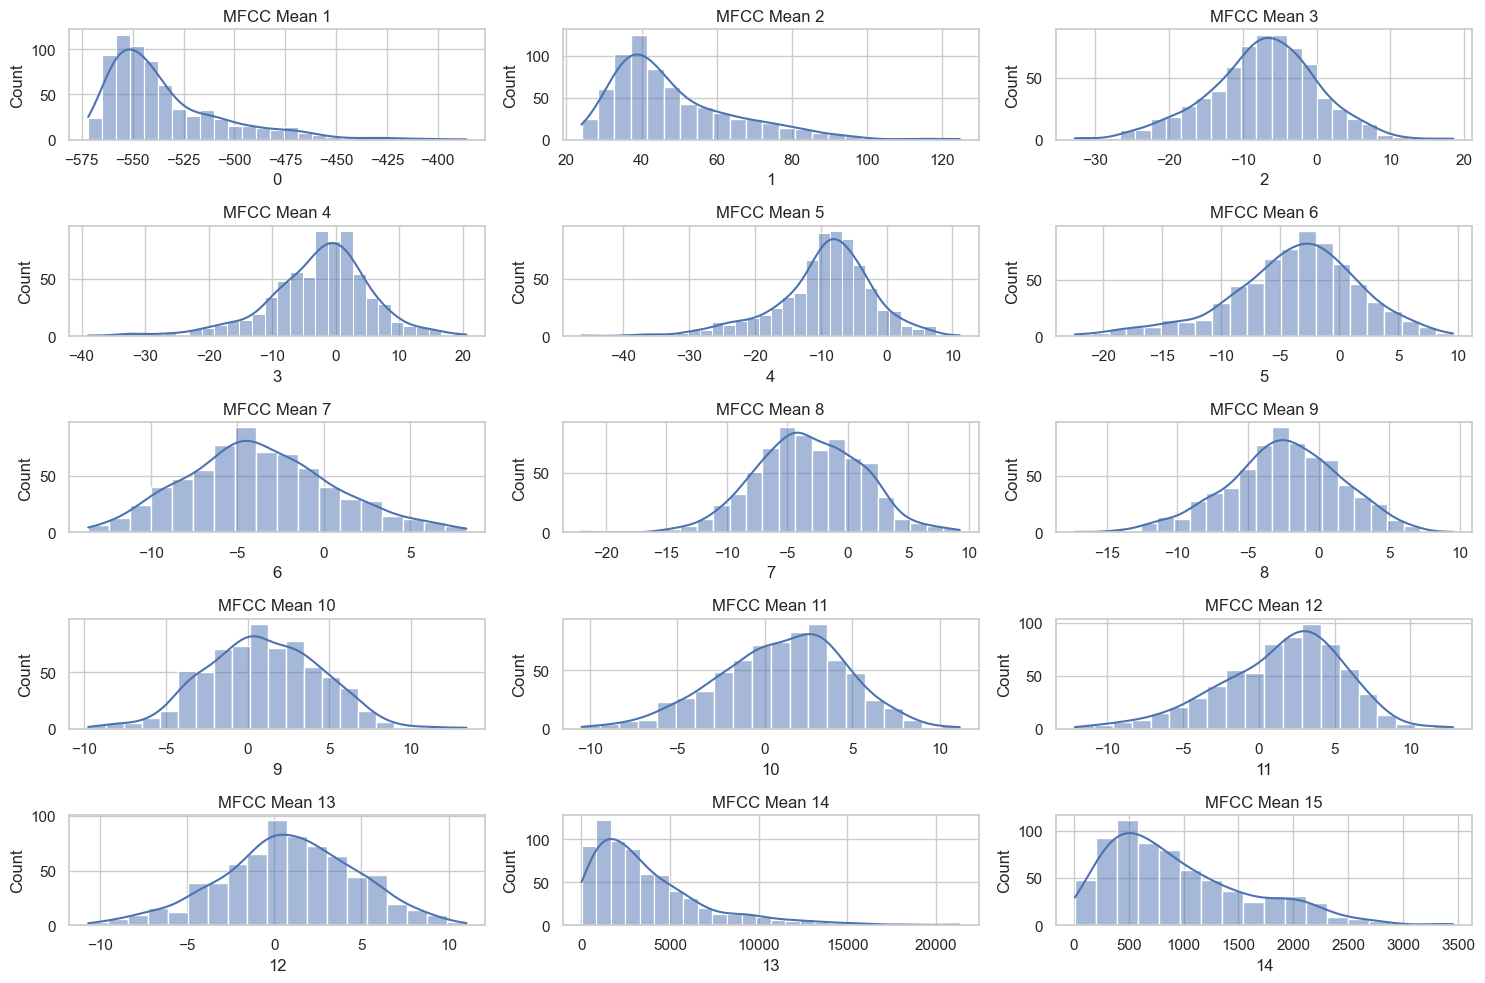

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms for each MFCC mean feature
fig, axes = plt.subplots(5, 3, figsize=(15, 10))  # Adjust the grid size according to the number of features
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(mfcc_features.columns):
        sns.histplot(mfcc_features.iloc[:, i], ax=ax, kde=True)
        ax.set_title(f'MFCC Mean {i+1}')
    else:
        ax.remove()

plt.tight_layout()
plt.show()


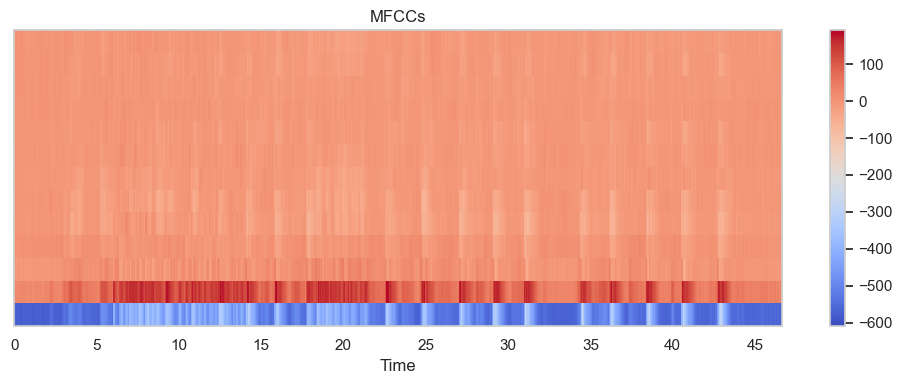

In [29]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Example of loading an audio file and computing its MFCCs
audio_path = 'data/audio/' + anno['filename'][0]
audio, sr = librosa.load(audio_path, sr=None)
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Plotting the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()


In [33]:
print(anno.columns)
labels = anno['context'].values  # Replace 'label' with the correct column name


Index(['filename', 'name', 'context', 'age', 'weight', 'sex', 'breed'], dtype='object')


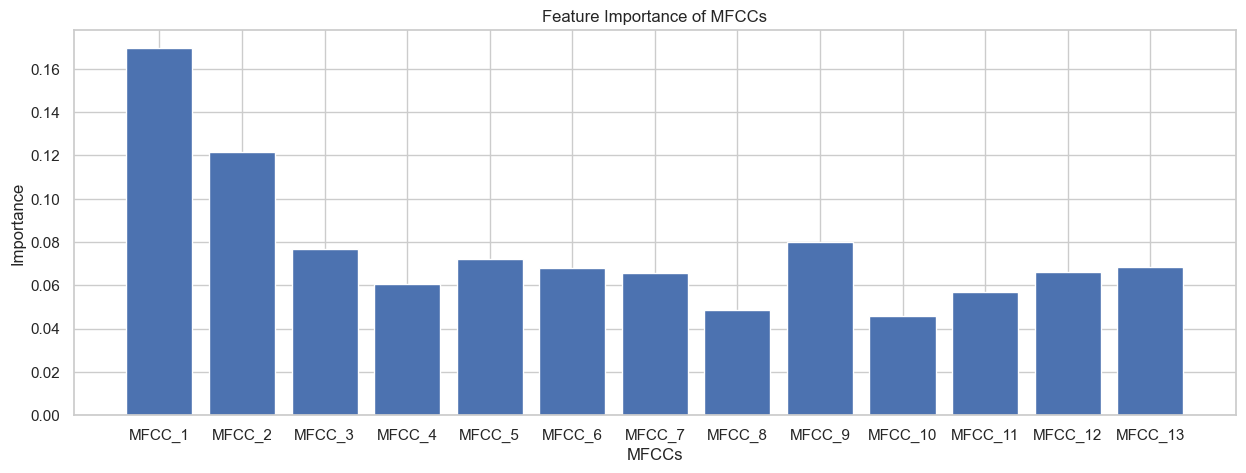

In [35]:
import librosa
import numpy as np
import pandas as pd

def extract_mfccs(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean

# Assuming the DataFrame 'anno' contains a correct column for audio file paths and labels
features = np.array([extract_mfccs(f'data/audio/{row["filename"]}') for index, row in anno.iterrows()])
labels = anno['context'].values  # Use the correct column name for labels

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(features, labels)

plt.figure(figsize=(15, 5))
plt.bar(range(1, len(model.feature_importances_)+1), model.feature_importances_, tick_label=['MFCC_' + str(i) for i in range(1, len(model.feature_importances_)+1)])
plt.xlabel('MFCCs')
plt.ylabel('Importance')
plt.title('Feature Importance of MFCCs')
plt.show()


In [38]:
print(anno.head())

          filename name     context  age  weight   sex  \
0    Mac-3-A-3.aif  Mac  aggression    5      34  male   
1    Mac-3-P-3.aif  Mac        play    5      34  male   
2   Mac-2-P-2d.aif  Mac        play    5      34  male   
3   Mac-2-P-2b.aif  Mac        play    5      34  male   
4  Mac-2-A-2a..aif  Mac  aggression    5      34  male   

                      breed  
0  German shorthair pointer  
1  German shorthair pointer  
2  German shorthair pointer  
3  German shorthair pointer  
4  German shorthair pointer  


In [39]:
from IPython.display import display
import pandas as pd

# Assume 'anno' is your DataFrame loaded previously
display(anno.head())


,filename,name,context,age,weight,sex,breed
0,Mac-3-A-3.aif,Mac,aggression,5,34,male,German shorthair pointer
1,Mac-3-P-3.aif,Mac,play,5,34,male,German shorthair pointer
2,Mac-2-P-2d.aif,Mac,play,5,34,male,German shorthair pointer
3,Mac-2-P-2b.aif,Mac,play,5,34,male,German shorthair pointer
4,Mac-2-A-2a..aif,Mac,aggression,5,34,male,German shorthair pointer
